In [2]:
import pandas as pd

books = pd.read_csv('assets/books.csv')  # Example usage of pandas to read a CSV file

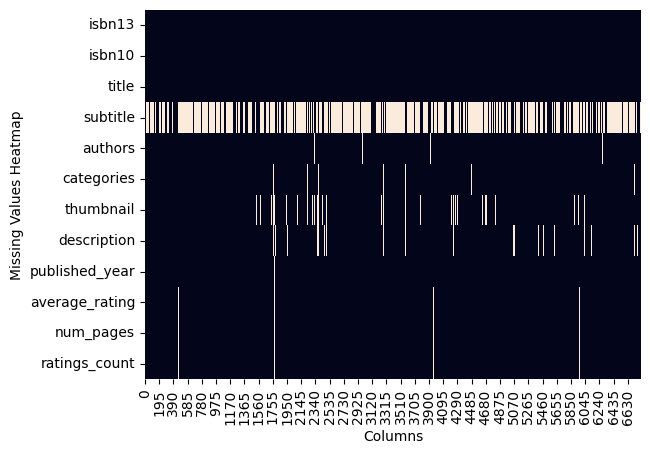

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.axes()
sns.heatmap(books.isna().transpose(), ax=ax, cbar=False)
plt.xlabel('Columns')
plt.ylabel('Missing Values Heatmap')
plt.show()

In [9]:
import numpy as np

books["missing_description"] = np.where(books["description"].isna(), 1, 0)
books["age_of_book"] = 2025 - books["published_year"]
books

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0,1,32.0
6807,9788445074879,8445074873,Fahrenheit 451,NaN,Ray Bradbury,Book burning,NaN,NaN,2004.0,3.98,186.0,5733.0,1,21.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,44.0


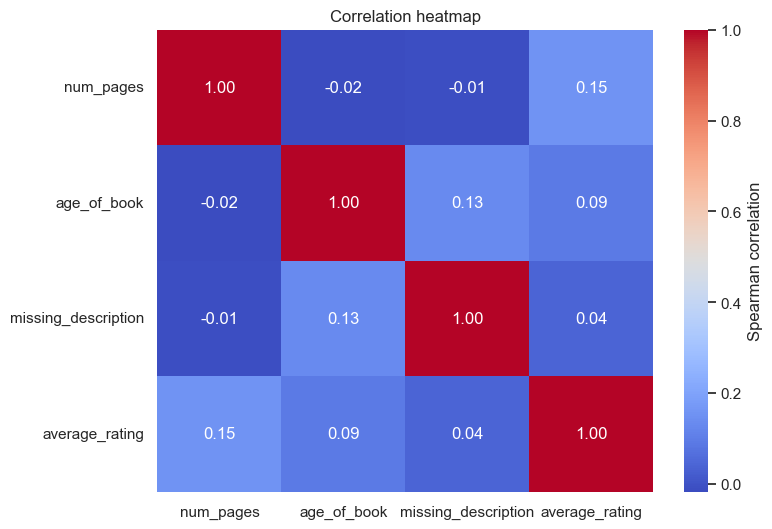

In [10]:
columns_of_interest = ["num_pages", "age_of_book", "missing_description", "average_rating"]

correlation_matrix = books[columns_of_interest].corr(method = "spearman")

sns.set_theme(style="darkgrid")
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"label": "Spearman correlation"})

heatmap.set_title("Correlation heatmap")
plt.show()


In [11]:
subsets = [
    "description",
    "subtitle", 
    "num_pages", 
    "average_rating", 
    "published_year", 
    "authors"
]
# book_missing = books.dropna(subset=subsets, inplace=True)
book_missing = books[
    ~(books[subsets[0]].isna())&
    ~(books[subsets[1]].isna())&
    ~(books[subsets[2]].isna())&
    ~(books[subsets[3]].isna())&
    ~(books[subsets[4]].isna())&
    ~(books[subsets[5]].isna())
]

In [12]:
book_missing["categories"].value_counts().reset_index().sort_values("count", ascending=False)
book_missing["words_in_description"] = book_missing["description"].str.split().str.len()
book_missing

/var/folders/fm/767fvbbx4v303sbk169wx3500000gn/T/ipykernel_1641/58596795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing["words_in_description"] = book_missing["description"].str.split().str.len()


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205
7,9780006380832,0006380832,Empires of the Monsoon,A History of the Indian Ocean and Its Invaders,Richard Hall,"Africa, East",http://books.google.com/books/content?id=MuPEQ...,Until Vasco da Gama discovered the sea-route t...,1998.0,4.41,608.0,65.0,0,27.0,80
8,9780006470229,000647022X,The Gap Into Madness,Chaos and Order,Stephen R. Donaldson,"Hyland, Morn (Fictitious character)",http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994.0,4.15,743.0,103.0,0,31.0,160
25,9780006499626,0006499627,Miss Marple,The Complete Short Stories,Agatha Christie,"Detective and mystery stories, English",http://books.google.com/books/content?id=a96qP...,"Miss Marple featured in 20 short stories, publ...",1997.0,4.20,359.0,6235.0,0,28.0,41
34,9780006551812,0006551815,'Tis,A Memoir,Frank McCourt,Ireland,http://books.google.com/books/content?id=Q3BhQ...,FROM THE PULIZER PRIZE-WINNING AUTHOR OF THE #...,2000.0,3.68,495.0,44179.0,0,25.0,210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6790,9783856305581,3856305580,C.G. Jung and Hermann Hesse,A Record of Two Friendships,Miguel Serrano,Psychology,http://books.google.com/books/content?id=sQt8b...,"Miguel Serrano, a Chilean diplomat and writer ...",1997.0,4.03,142.0,373.0,0,28.0,75
6793,9784766113389,4766113381,How to Draw Manga,Girls' Life Illustration File,Kazuko Tadano,Art,http://books.google.com/books/content?id=N3s3G...,This volume was inspired by young women workin...,2003.0,4.14,132.0,65.0,0,22.0,53
6796,9784770028037,4770028032,日本語の感情表現集,Expressing Emotions in Japanese,村上真美子,Foreign Language Study,http://books.google.com/books/content?id=ST7ru...,This is a student's guide to the expression of...,2002.0,3.54,176.0,27.0,0,23.0,94
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174


In [13]:
book_missing.loc[book_missing["words_in_description"].between(5, 14), "description"]

94      The title story in this collection of shorts n...
154     A collection of humorous poems and drawings. C...
333     A stunning collection of Annie Dillard's most ...
363     A New York City chef and author of Gone Bamboo...
682                      Biography of John Wesley Powell.
                              ...                        
6655    "How truth commissions around the world are ch...
6660    A collection of over one hundred limericks acc...
6697    A recounting of the copyright problems surroun...
6715    The first comprehensive guide to addressing Na...
6757                          Audio Book- unabriged on CD
Name: description, Length: 107, dtype: object